### Column Description

Product_id - Unique ID of each product

Stall_no - Represents the number of stalls in the carnival (1-50)

instock_date - Represents the date and time on which the product was bought

Market_Category - Represents the different market categories that the products belong to

Customer_name - Represents the names of the customers

Loyalty_customer - Represents if a customer is a loyal customer

Product_Category - Represents the 10 different product categories that the products belong to

Grade - Represents the quality of products

Demand - Represents the demand for the products being sold at the carnival

Discount_avail - Represents whether a product is being sold at a discount or not

charges_1 - Represents the types of charges applied on the products in the carnival

charges_2 (%) - Represents the types of charges applied on the products in the carnival

Minimum_price - Represents the minimum price of a product

Maximum_price - Represents the maximum price of a product

Selling_Price - Represents the selling price of the product in the carnival


In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
data = pd.read_csv("C:/Users/91899/Desktop/HackerEarth/Carnival_Wars/dataset/train.csv")
data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [3]:
test = pd.read_csv("C:/Users/91899/Desktop/HackerEarth/Carnival_Wars/dataset/test.csv")
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [4]:
test.shape

(3430, 14)

In [5]:
data.shape

(6368, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
Product_id          6368 non-null object
Stall_no            6363 non-null float64
instock_date        6368 non-null object
Market_Category     6368 non-null int64
Customer_name       6157 non-null object
Loyalty_customer    6368 non-null object
Product_Category    6368 non-null object
Grade               6368 non-null int64
Demand              6368 non-null int64
Discount_avail      6330 non-null float64
charges_1           6170 non-null float64
charges_2 (%)       6163 non-null float64
Minimum_price       6330 non-null float64
Maximum_price       6025 non-null float64
Selling_Price       6327 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [7]:
data.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


#### Hear we can see the Selling price is having min value negative.

# Handling Null values

In [8]:
# let see nan value present in the data
data.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [9]:
# Dropping Customer_name column as it has not useful for prediction
data.drop('Customer_name', axis = 1, inplace =True)

In [10]:
# Dropping Customer_name column as it has not useful for prediction
test.drop('Customer_name', axis = 1, inplace =True)

In [11]:
data['Discount_avail'].value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [12]:
data['Discount_avail'].isna().sum()

38

In [13]:
data['Discount_avail'].fillna(0, inplace = True)

In [14]:
data['Discount_avail'] = data['Discount_avail'].replace({ 0.0 : 'No', 0 : 'No', 1.0:'Yes'})

In [15]:
data['Discount_avail'].value_counts()

No     5479
Yes     889
Name: Discount_avail, dtype: int64

In [16]:
# Selling price can't be negative and null so I have replaced less than 0 values with minimum price
data['Selling_Price'] = data['Selling_Price'].fillna(data['Minimum_price'])

In [17]:
data['Stall_no'] = data['Stall_no'].fillna(0)

In [18]:
test['Stall_no'].isna().sum()
test['Stall_no'] = test['Stall_no'].fillna(0)

In [19]:
# lets check the nan values which are in the maximum_price feature
data[data['Maximum_price'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,No,Fashion,0,74,No,NaN,11.0,786.0,NaN,2582.860500
36,NKCE5T3GVHYKZSDH,5.0,2015-11-19 03:54:47.000,14,Yes,Child_care,0,61,No,323.0,14.0,5682.0,NaN,7056.729900
77,CRTECN2QXXNYW7QY,12.0,2015-09-23 16:25:12.000,3,Yes,Fashion,0,32,No,369.0,14.0,1247.0,NaN,2632.572075
87,RTRE9WHYCSYHZKDM,19.0,2015-11-20 03:56:39.000,24,No,Pet_care,0,75,No,104.0,9.0,8262.0,NaN,9766.132200
106,MUGEACY8DDVJ8QAD,30.0,2015-09-22 17:22:59.000,451,Yes,Fashion,0,53,No,NaN,17.0,4627.0,NaN,5512.304016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,SHIEB85ZRAUWMFTT,34.0,2015-08-15 21:24:25.000,114,Yes,Hospitality,0,96,No,297.0,5.0,1377.0,NaN,2215.609088
6325,SHIEHGXG5PNH2HEF,27.0,2015-08-15 23:08:18.000,449,Yes,Fashion,0,60,Yes,386.0,12.0,5413.0,NaN,1004.197969
6331,BRAEDNX2NKMJFZ74,46.0,2015-08-19 19:14:10.000,99,Yes,Fashion,0,43,No,375.0,NaN,579.0,NaN,1716.066432
6355,BRAEBUHTTCZKDPTC,20.0,2015-08-20 02:32:24.000,65,No,Technology,0,81,No,564.0,16.0,3669.0,NaN,5165.500032


In [20]:
# Here filling the Maximum price by using Minimum_price, charges1 and charges2
data['Maximum_price'] = data['Maximum_price'].fillna((data['Minimum_price'] + data['charges_1'])*(data['charges_2 (%)']/100))

In [21]:
# Dropping 48 rows cause it collides with other feature NaN values.
data.drop(data[data['Maximum_price'].isnull()].index, axis = 0, inplace = True)

In [22]:
data[(data['charges_1'].isna())  & (data['charges_2 (%)'].isna())]

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Yes,Cosmetics,3,31,No,NaN,NaN,9483.0,13644.0,11761.213275
760,BRAEDNFGGHAFHEY4,7.0,2015-08-19 02:31:36.000,23,No,Organic,2,51,No,NaN,NaN,1806.0,5555.0,3759.126624
1691,DREEGWW9DMTGZDZZ,27.0,2015-11-13 15:06:18.000,188,Yes,Hospitality,0,20,No,NaN,NaN,3098.0,4201.0,3893.001275
1835,BRAEBUHXKDBWRMCK,1.0,2015-08-20 20:48:14.000,23,No,Child_care,1,44,No,NaN,NaN,2433.0,3583.0,3278.293776
2096,SHIECMGF5WTA2WGG,38.0,2015-09-26 14:18:31.000,57,Yes,Fashion,0,24,No,NaN,NaN,2479.0,5151.0,4177.111050
2906,HACEJXFJZ5HSR8QT,3.0,2015-09-22 13:24:08.000,58,No,Repair,0,91,No,NaN,NaN,3239.0,4779.0,4239.666816
3194,NKCE7MMGPAKN8CMJ,30.0,2015-10-20 02:34:52.000,113,No,Educational,0,34,No,NaN,NaN,2009.0,5656.0,3937.850700
4902,BRAE6Z79SBPKJ8GS,8.0,2015-08-18 19:15:41.000,87,Yes,Technology,0,68,Yes,NaN,NaN,4276.0,6443.0,884.869920
5690,FABE7D5ZH3MPNEQV,44.0,2015-10-01 19:02:11.000,55,No,Repair,0,68,No,NaN,NaN,2017.0,3754.0,3126.073500


In [23]:
# Filling the charges_1 null values with forward fill
data['charges_1'].fillna(method = 'ffill', limit = 2, inplace = True)

In [24]:
test['charges_1'].fillna(method = 'ffill', limit = 2, inplace = True)

In [25]:
# Filling the charges_2 null values with forward fill
data['charges_2 (%)'].fillna(method = 'ffill', limit = 2, inplace = True)

In [26]:
test['charges_2 (%)'].fillna(method = 'ffill', limit = 2, inplace = True)

In [27]:
# Filling the null values of minimum_price
data['Minimum_price'] = data['Minimum_price'].fillna((data['Maximum_price'] - data['charges_1'])*((100 - data['charges_2 (%)'])/100))

In [28]:
test['Minimum_price'] = test['Minimum_price'].fillna((test['Maximum_price'] - test['charges_1'])*((100 - test['charges_2 (%)'])/100))

In [29]:
# Selling price can't be negative so I have replaced less than 0 values with minimum price
data.loc[data['Selling_Price'] < 0, 'Selling_Price'] = data['Minimum_price']

In [30]:
test.isnull().sum()

Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [31]:
data.isnull().sum()

Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

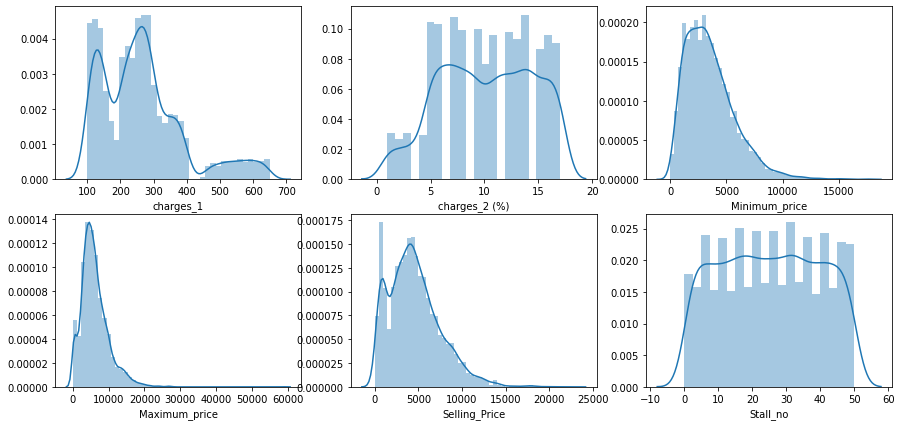

In [32]:
fig, axes = plt.subplots(2,3,figsize=(15,7))
sns.distplot(data['charges_1'], ax=axes[0,0])
sns.distplot(data['charges_2 (%)'], ax=axes[0,1])
sns.distplot(data['Minimum_price'], ax=axes[0,2])
sns.distplot(data['Maximum_price'], ax=axes[1,0])
sns.distplot(data['Selling_Price'], ax=axes[1,1])
sns.distplot(data['Stall_no'], ax=axes[1,2])
plt.show()

In [33]:
test.shape

(3430, 13)

In [34]:
data['Product_id'] = data['Product_id'].astype('category')
test['Product_id'] = test['Product_id'].astype('category')

In [35]:
data['Loyalty_customer'] = data['Loyalty_customer'].astype('category')
test['Loyalty_customer'] = test['Loyalty_customer'].astype('category')

In [36]:
data['Product_Category'] = data['Product_Category'].astype('category')
test['Product_Category'] = test['Product_Category'].astype('category')

In [37]:
data['instock_date'] = pd.to_datetime(data['instock_date'], format='%Y-%m-%d %H:%M:%S')
test['instock_date'] = pd.to_datetime(test['instock_date'], format='%Y-%m-%d %H:%M:%S')

In [38]:
data['Discount_avail'] = data['Discount_avail'].astype('category')
test['Discount_avail'] = test['Discount_avail'].astype('category')

In [39]:
data['Stall_no'] = data['Stall_no'].astype(int)
test['Stall_no'] = test['Stall_no'].astype(int)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 13 columns):
Product_id          3430 non-null category
Stall_no            3430 non-null int32
instock_date        3430 non-null datetime64[ns]
Market_Category     3430 non-null int64
Loyalty_customer    3430 non-null category
Product_Category    3430 non-null category
Grade               3430 non-null int64
Demand              3430 non-null int64
Discount_avail      3430 non-null category
charges_1           3430 non-null float64
charges_2 (%)       3430 non-null float64
Minimum_price       3430 non-null float64
Maximum_price       3430 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int32(1), int64(4)
memory usage: 432.0 KB


In [41]:
# By removing all the null values from the dataset, RMSE is 352.

In [42]:
test.shape

(3430, 13)

# Handling Outliers 

In [43]:
# Lets check correlation between the features

In [44]:
data.corr()

,Stall_no,Market_Category,Grade,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.008207,-0.001867,0.003997,-0.004643,-0.004007,-0.004807,-0.001909,0.008962
Market_Category,-0.008207,1.000000,-0.038034,-0.017535,0.021391,0.020538,0.192855,0.112592,0.138704
Grade,-0.001867,-0.038034,1.000000,0.009488,-0.026141,-0.014647,-0.078561,0.160737,0.082064
Demand,0.003997,-0.017535,0.009488,1.000000,-0.006103,0.015246,0.009121,-0.002800,-0.000392
charges_1,-0.004643,0.021391,-0.026141,-0.006103,1.000000,0.257385,0.021308,0.004891,0.057438
charges_2 (%),-0.004007,0.020538,-0.014647,0.015246,0.257385,1.000000,0.002198,0.008619,0.008193
Minimum_price,-0.004807,0.192855,-0.078561,0.009121,0.021308,0.002198,1.000000,0.658140,0.706574
Maximum_price,-0.001909,0.112592,0.160737,-0.002800,0.004891,0.008619,0.658140,1.000000,0.718413
Selling_Price,0.008962,0.138704,0.082064,-0.000392,0.057438,0.008193,0.706574,0.718413,1.000000


In [45]:
data.corr() > 0.8

,Stall_no,Market_Category,Grade,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,True,False,False,False,False,False,False,False,False
Market_Category,False,True,False,False,False,False,False,False,False
Grade,False,False,True,False,False,False,False,False,False
Demand,False,False,False,True,False,False,False,False,False
charges_1,False,False,False,False,True,False,False,False,False
charges_2 (%),False,False,False,False,False,True,False,False,False
Minimum_price,False,False,False,False,False,False,True,False,False
Maximum_price,False,False,False,False,False,False,False,True,False
Selling_Price,False,False,False,False,False,False,False,False,True


#### From this we can get an inference that no features are correlated

In [46]:
data.skew()

Stall_no           0.004341
Market_Category    0.462427
Grade              1.197605
Demand            -0.014777
charges_1          1.090658
charges_2 (%)     -0.138276
Minimum_price      1.169136
Maximum_price      1.577610
Selling_Price      0.918192
dtype: float64

In [47]:
data.kurt()

Stall_no          -1.176857
Market_Category   -1.420226
Grade             -0.143552
Demand            -1.216519
charges_1          1.001224
charges_2 (%)     -0.972298
Minimum_price      2.232077
Maximum_price      7.777393
Selling_Price      1.349512
dtype: float64

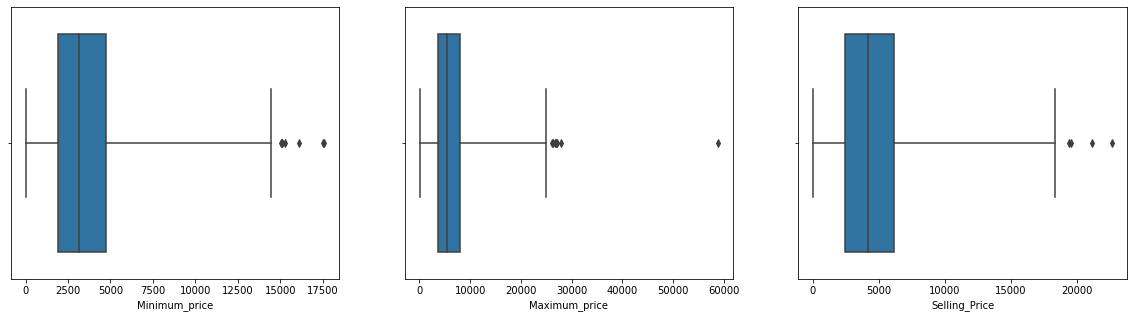

In [48]:
fig, axes = plt.subplots(1,3, figsize = (20,5))
sns.boxplot(data['Minimum_price'],  whis = 3.5, ax = axes[0])
sns.boxplot(data['Maximum_price'],  whis = 4 , ax = axes[1])
sns.boxplot(data['Selling_Price'], whis = 3.5, ax = axes[2])
plt.show()

In [49]:
q1 = data['Minimum_price'].quantile(0.25)
q3 = data['Minimum_price'].quantile(0.75)
IQR = q3 - q1
IQR

2834.0

In [50]:
upper_limit = q3 + 3.5*IQR
upper_limit

14634.0

In [51]:
lower_limit = q1 - 1.5*IQR
lower_limit

-2370.0

In [52]:
data[data['Minimum_price'] > upper_limit]

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
374,WATEF3HQZ3KB7U4V,42,2016-03-28 20:59:38,234,Yes,Child_care,0,57,No,337.0,14.0,15106.0,19763.0,17682.016176
1491,PCSEC86V5NPJGZP7,48,2016-03-28 21:01:36,234,Yes,Pet_care,0,20,No,171.0,4.0,15264.0,19982.0,17400.526375
1740,PCSE4TF3HP7QP3NR,43,2016-03-28 20:59:34,234,Yes,Home_decor,1,35,No,272.0,11.0,16099.0,20137.0,18363.905175
2205,SGLEGBV6TXYCHAVG,12,2016-03-29 19:41:29,244,Yes,Fashion,0,69,No,369.0,14.0,15118.0,26817.0,21152.191500
4092,WATDZ2ZQGTENGJDH,12,2016-03-28 19:59:10,225,Yes,Technology,0,31,No,635.0,14.0,15034.0,22915.0,19586.969850
5432,WATDZ5HGUUHWPYHC,19,2016-03-28 20:01:39,358,Yes,Cosmetics,3,33,Yes,206.0,17.0,17539.0,23652.0,3117.662809
5661,BBAEHWDDMZNYAA3R,28,2016-03-29 19:56:12,244,Yes,Home_decor,0,12,No,215.0,15.0,17580.0,27204.0,22638.325941


In [53]:
# removing outliers from Minimum_price feature
data.drop(data[data['Minimum_price'] > upper_limit].index, axis =0, inplace = True)

In [54]:
### By removing outliers from Minimum_price feature RMSE is 452.

In [55]:
# Outliers for Maximum_price features

In [56]:
q1 = data['Maximum_price'].quantile(0.25)
q3 = data['Maximum_price'].quantile(0.75)
IQR = q3 - q1
IQR

4306.0

In [57]:
upper_limit = q3 + 4*IQR
upper_limit

25169.0

In [58]:
lower_limit = q1 - 1.5*IQR
lower_limit

-2820.0

In [59]:
data[data['Maximum_price'] > upper_limit]

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
13,GLSEHPS9CJATDCTY,45,2016-03-10 07:40:07,186,Yes,Cosmetics,0,38,Yes,291.0,17.0,3657.0,58812.0,4724.948025
237,PCSECV3FHFGEG7FG,22,2016-03-28 21:03:11,358,Yes,Hospitality,3,100,No,342.0,13.0,10616.0,26236.0,18369.131125
1610,WATDWABR2QMHU2YK,14,2016-03-28 20:04:08,183,Yes,Hospitality,2,71,Yes,206.0,14.0,11872.0,26712.0,2899.463985
3344,KRTE8BQ3PS5DHXTC,41,2016-03-28 20:43:01,358,Yes,Technology,3,15,No,527.0,12.0,8860.0,26082.0,18017.168103
3559,ACCDXFFDW2X8MRFF,47,2016-03-18 19:37:22,256,Yes,Cosmetics,0,19,No,287.0,15.0,6221.0,26878.0,16859.633868
4896,WATDJTR9HJQGBGWG,28,2016-03-28 20:01:23,256,Yes,Fashion,0,23,No,361.0,11.0,4018.0,27827.0,16260.257475


In [60]:
# removing outliers from Maximum_price feature
data.drop(data[data['Maximum_price'] > upper_limit].index, axis =0, inplace = True)

In [61]:
# By only remvoing outliers from the Maximum_price feature, RMSE is 336.
# By removing outliers from the Maximum_price feature RMSE increased by 100

In [62]:
q1 = data['Selling_Price'].quantile(0.25)
q3 = data['Selling_Price'].quantile(0.75)
IQR = q3 - q1
IQR

3721.2187155

In [63]:
upper_limit = q3 + 3.5*IQR
upper_limit

19178.799669750002

In [64]:
lower_limit = q1 - 1.5*IQR
lower_limit

-3148.5126232500006

In [65]:
data[data['Selling_Price'] > upper_limit]

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
3775,WATEYAP32CYSTUGF,28,2016-03-28 21:40:20,234,Yes,Repair,1,84,No,278.0,4.0,14431.0,24362.0,19398.835456


In [66]:
# removing outliers from Selling_price feature
data.drop(data[data['Selling_Price'] > upper_limit].index, axis =0, inplace = True)

In [67]:
# after removing only Selling_price feature outliers, RMSE is 353
# After removing all the outliers, RMSE was 316.
# So after removing all the outliers, RMSE was the least i.e 316.

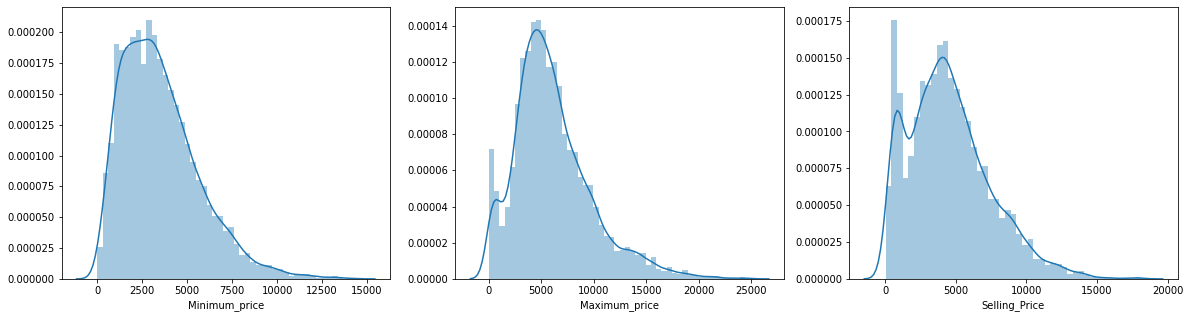

In [68]:
fig, axes = plt.subplots(1,3, figsize = (20,5))
sns.distplot(data['Minimum_price'],  ax = axes[0])
sns.distplot(data['Maximum_price'], ax = axes[1])
sns.distplot(data['Selling_Price'], ax = axes[2])
plt.show()

# Feature Engineering

In [69]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["Product_id"] = lb.fit_transform(data["Product_id"])

In [70]:
test["Product_id"] = lb.fit_transform(test["Product_id"])

In [71]:
data.head()

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,534,37,2015-08-22 18:36:12,2,Yes,Fashion,1,68,No,376.0,11.0,2983.0,4713.0,4185.947700
1,5892,38,2016-03-27 21:19:13,24,Yes,Fashion,0,51,No,397.0,12.0,7495.0,10352.0,9271.490256
2,804,9,2015-08-18 19:25:22,447,Yes,Child_care,0,10,No,250.0,9.0,5752.0,7309.0,6785.701362
3,6087,50,2016-03-28 21:53:01,23,Yes,Educational,2,48,No,144.0,13.0,5090.0,20814.0,13028.917824
4,2309,7,2016-03-29 22:58:53,63,Yes,Repair,1,35,Yes,211.0,4.0,2430.0,9261.0,906.553935


In [72]:
#test["Product_id"] = lb.inverse_transform(test["Product_id"])

In [73]:
test.shape

(3430, 13)

In [74]:
data["Discount_avail"] = lb.fit_transform(data["Discount_avail"])

In [75]:
test["Discount_avail"] = lb.fit_transform(test["Discount_avail"])

In [76]:
data["Loyalty_customer"] = lb.fit_transform(data["Loyalty_customer"])

In [77]:
test["Loyalty_customer"] = lb.fit_transform(test["Loyalty_customer"])

In [78]:
data.drop("instock_date", inplace = True, axis =1)
test.drop("instock_date", inplace = True, axis =1)

In [79]:
test.shape

(3430, 12)

In [80]:
Product_Category = data['Product_Category']
Product_Category = pd.get_dummies(Product_Category, drop_first = True)

Product_Category.head()

Product_Category,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0


In [81]:
df = pd.concat([data,Product_Category], axis = 1)
df.drop(['Product_Category'], axis =1, inplace = True)
df.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,...,Selling_Price,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,534,37,2,1,1,68,0,376.0,11.0,2983.0,...,4185.947700,0,0,1,0,0,0,0,0,0
1,5892,38,24,1,0,51,0,397.0,12.0,7495.0,...,9271.490256,0,0,1,0,0,0,0,0,0
2,804,9,447,1,0,10,0,250.0,9.0,5752.0,...,6785.701362,0,0,0,0,0,0,0,0,0
3,6087,50,23,1,2,48,0,144.0,13.0,5090.0,...,13028.917824,0,1,0,0,0,0,0,0,0
4,2309,7,63,1,1,35,1,211.0,4.0,2430.0,...,906.553935,0,0,0,0,0,0,0,1,0


In [82]:
df.shape

(6306, 21)

In [83]:
test.shape

(3430, 12)

In [84]:
Product_Cat = test['Product_Category']
Product_Cat = pd.get_dummies(Product_Cat, drop_first = True)

Product_Cat.head()

Product_Category,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [85]:
df_test = pd.concat([test,Product_Cat], axis = 1)
df_test.drop(['Product_Category'], axis =1, inplace = True)
df_test.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,2508,39,205,0,0,90,0,380.0,16.0,2576.0,3340,0,0,1,0,0,0,0,0,0
1,113,49,3,1,0,87,0,393.0,16.0,1202.0,1955,0,0,1,0,0,0,0,0,0
2,1611,1,183,0,2,55,0,493.0,9.0,7175.0,15715,0,0,0,0,0,0,0,0,1
3,1849,8,358,1,3,86,0,303.0,16.0,5404.0,13078,0,0,0,0,0,0,0,0,0
4,3125,33,167,0,0,27,0,567.0,16.0,4069.0,6244,0,0,0,0,0,0,0,0,1


In [86]:
df_test.shape

(3430, 20)

In [87]:
y = df['Selling_Price']
X = df.drop(['Selling_Price'], axis = 1, inplace = False)

In [88]:
y.head()

0     4185.947700
1     9271.490256
2     6785.701362
3    13028.917824
4      906.553935
Name: Selling_Price, dtype: float64

In [89]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape((len(y),1))
boxci = PowerTransformer(method='yeo-johnson', standardize=True)
y = boxci.fit_transform(y)

In [90]:
y

array([[0.05422624],
       [1.45200843],
       [0.83678052],
       ...,
       [1.66412599],
       [0.43109789],
       [0.38864408]])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Pipeline

In [135]:
#Regressions
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [93]:
xgboost_red = xgboost.XGBRegressor(n_jobs=-1)
xgboost_red.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
y_pred = xgboost_red.predict(X_test)

In [95]:
xgboost_red.score(X_train, y_train)

0.9994056447195602

In [96]:
xgboost_red.score(X_test, y_test)

0.9839172276284159

In [97]:
predict_train = xgboost_red.predict(X_train)
predict_test  = xgboost_red.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.024357471933860318
RMSE on test data:  0.12718056490837112


In [294]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [295]:
y_pred = reg_rf.predict(X_test)
print(reg_rf.score(X_train, y_train))
print(reg_rf.score(X_test, y_test))

0.9968732404725986
0.9823662881803846


In [296]:
predict_train = reg_rf.predict(X_train)
predict_test  = reg_rf.predict(X_test)

In [297]:
print('RMSE on train data: ', np.sqrt(metrics.mean_squared_error(y_train, predict_train)))
print('RMSE on test data: ',  np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

RMSE on train data:  0.055867133548065905
RMSE on test data:  0.13317176680426995


In [230]:
df_test.shape

(3430, 20)

In [99]:
import pickle
# open a file, where you ant to store the data
file = open('xgboost.pkl', 'wb')

# dump information to that file
pickle.dump(xgboost_red, file)

In [100]:
result = xgboost_red.predict(df_test)

In [101]:
result

array([-0.32379174, -0.8840945 ,  2.0485234 , ...,  0.75358665,
       -0.1815294 , -1.1836611 ], dtype=float32)

In [106]:
results = pd.DataFrame(data=result)
results.head()

,0
0,-0.323792
1,-0.884094
2,2.048523
3,1.485945
4,0.502662


In [108]:
# Applying inverse power transform to get back original form of selling price
a_inverse_transformed = boxci.inverse_transform(results)

In [109]:
a_inverse_transformed

array([[ 3155.07012131],
       [ 1895.96182644],
       [12053.90243451],
       ...,
       [ 6479.44476047],
       [ 3525.85574021],
       [ 1354.20900083]])

In [125]:
res = pd.DataFrame(data=a_inverse_transformed, columns={'Selling_Price': '0'}).round(2)
res.head()

,Selling_Price
0,3155.07
1,1895.96
2,12053.90
3,9419.95
4,5598.80


In [127]:
Product_id = test1['Product_id']

0    SCHE4YSTDVPVZVXW
1    ACCEGCATKHNRXUHW
2    NKCE6GJ5XVJDXNNZ
3    NKCEB8BK3ZXDHDHM
4    TOPEFDXSAHRNPF94
Name: Product_id, dtype: object

In [130]:
res1 = pd.concat([Product_id, res], axis = 1)

In [133]:
results = pd.DataFrame(data = res1, columns = {'Product_id': '0', 'Selling_Price': '1'})
results.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3155.07
1,ACCEGCATKHNRXUHW,1895.96
2,NKCE6GJ5XVJDXNNZ,12053.90
3,NKCEB8BK3ZXDHDHM,9419.95
4,TOPEFDXSAHRNPF94,5598.80


In [134]:
results.to_csv("Submission.csv", index=False)